# **✅ Complete Time Series Workflow (AirPassengers Data):**
### **Step 1: Load & Understand Data:**
- Load & Understand Data
- Dataset: AirPassengers
- Monthly airline passengers (1949-1960)
- Time-indexed numerical data → Time Series
### **Step 2: Visualize Time Series:**
- What we observed:
- Upward trend
- Clear seasonality
- Increasing variance over time
#### 📌 Conclusion:
- ➡️ Data is non-stationary
- ➡️ Seasonality increases with time

### **Step 3: Decomposition:**

We used multiplicative decomposition because seasonality grows with trend.

Y=Trend×Seasonality×Residual
- Components:
  - Trend → Long-term growth
  - Seasonality → Repeating yearly pattern
  - Residual → Random noise
#### 📌 Insight:
This confirms the data is seasonal + trending.

### **Step 4: Stationarity Check (ADF Test):**
- ADF test checks if:
- Mean is constant
- Variance is constant
#### Result:
- p-value > 0.05
- ❌ Data is not stationary

### **Step 5: Make Data Stationary**
We apply:
- Log transformation (to stabilize variance)
- Differencing (to remove trend)
- df_log = np.log(df)
- df_diff = df_log.diff().dropna()

Now data becomes stationary ✅

### **Step 6: Model Selection:**
Because data has:
- ✔ Trend
- ✔ Seasonality
- ✔ Monthly cycle

👉 Best model: SARIMA

Why SARIMA?
- Feature	Supported
- Trend	✅
- Seasonality	✅
- Monthly data	✅

# **Import Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

# **Load Dataset:**

In [ ]:
# data load
df = pd.read_csv('/content/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# **Data Analysis:**

In [ ]:
# Convert Month column to datetime
df["Month"] = pd.to_datetime(df["Month"])

In [ ]:
# Set Month as index
df.set_index("Month", inplace=True)

In [ ]:
 # Rename column for convenience
df.columns = ["Passengers"]
print(df.head())

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


- Month (yy-mm-dd)
- Data is sorted.

# **Plot Time Series Data:**
- plot the data for check trends, stationary, pattern, cycling.

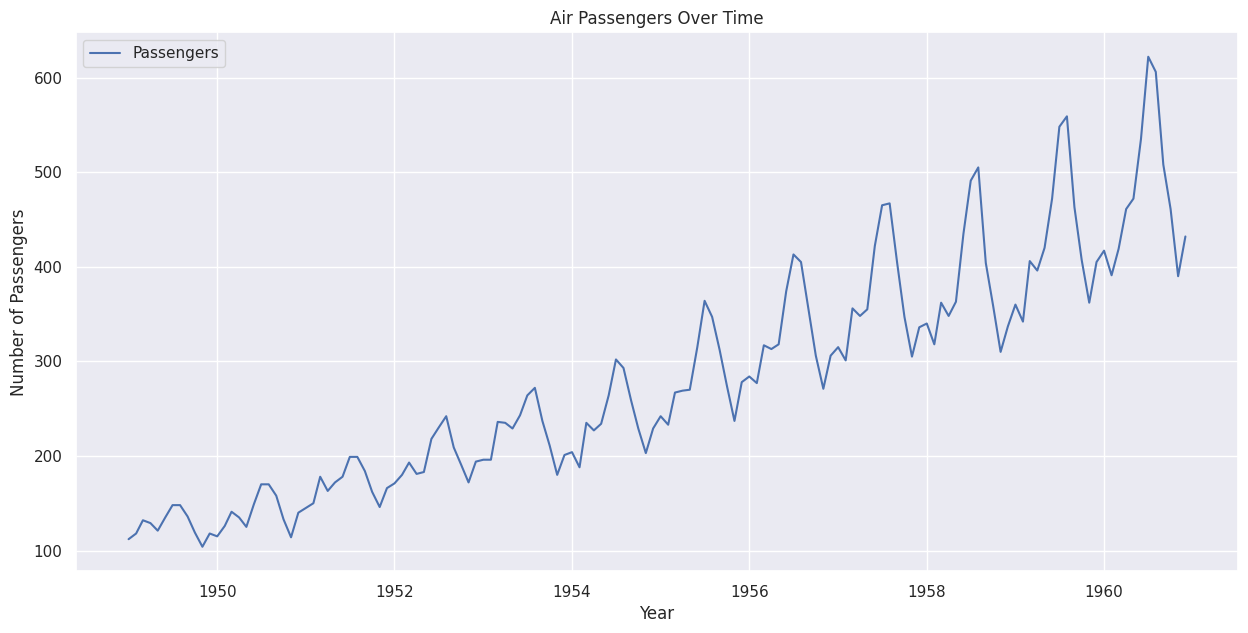

In [ ]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.lineplot(data=df)
plt.title("Air Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()


In [ ]:
import plotly.express as px
fig = px.line(df, x=df.index, y='Passengers', title='Air Passengers Over Time')
fig.show()

# **Time Series Decomposition:**
Using multiplicative model because seasonality increases with trend
- **Trend**: The long-term direction in the data, showing overall growth or decline over time.
- **Seasonal**: Regular, repeating patterns (like monthly or yearly cycles) that occur consistently.
- **Residual**: The leftover noise or random variation after removing trend and seasonal effects.


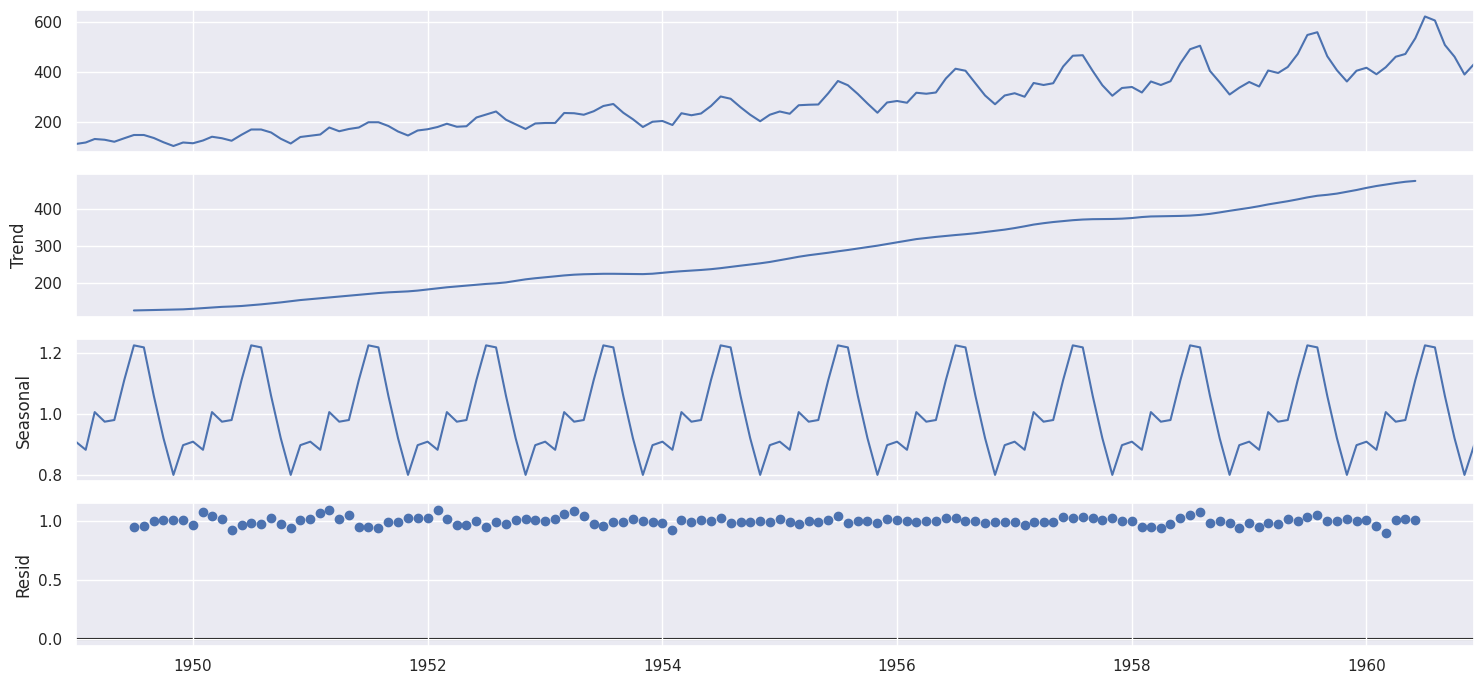

In [ ]:
decomposition = seasonal_decompose(df, model="multiplicative")
decomposition.plot()
plt.show()

In [ ]:
fig = px.line(decomposition.observed, x=decomposition.observed.index, y=decomposition.observed.values, title='observed')
fig.show()

### **Seasonal Trend:**
- We zoom a pattren and observed it.
- There's a clear upward trend from November to July , followed by a decline toward November. This suggests seasonal variation, likely tied to travel patterns (e.g., summer peak in July).
### **Peak and Trough:**
- **Peak:** Around July, passenger numbers are at their highest.
- **Trough:** The lowest point appears near November 1953 and again toward November 1954, indicating a cyclical dip.
- **Overall Growth:** Despite fluctuations, the general level of the time series seems to be increasing, hinting at long-term growth in air travel demand.
- **Volatility:** The amplitude of fluctuations suggests that passenger numbers vary significantly month to month, which is typical for industries influenced by holidays, seasons, or economic cycles.


# **Stationarity Check (ADF Test):**
 Augmented Dickey-Fuller (ADF) test to check if the Air Passengers time series is stationary.


In [ ]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])

print("ADF Test on Original Data:")
adf_test(df["Passengers"])

ADF Test on Original Data:
ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


- The ADF test results for the original data show an 'ADF Statistic' of approximately 0.815 and a 'p-value' of approximately 0.992. Since the p-value (0.992) is much greater than the common significance level of 0.05, we fail to reject the null hypothesis.
- This means that the original Air Passengers data is not stationary.

# **6. Make Data Stationary:**
### **Step 1: Log transformation (stabilize variance)**
- This reduces variance instability (i.e., makes fluctuations more uniform).
- Useful when data grows exponentially, like air passenger numbers.

In [ ]:
df_log = np.log(df)

#### **Step 2: Differencing (remove trend)**
- Removes trend by subtracting each value from its previous one.
- Helps stabilize the mean over time.


In [ ]:
df_log_diff = df_log.diff().dropna()

- Applies the Augmented Dickey-Fuller test to check if the transformed data is now stationary.


In [ ]:
print("\nADF Test after Log + Differencing:")
adf_test(df_log_diff["Passengers"])


ADF Test after Log + Differencing:
ADF Statistic: -2.717130598388114
p-value: 0.07112054815086184


- p-value is close to 0.05 but still above, the data is almost stationary


# **7. Train SARIMA Model:**


In [ ]:
# SARIMAX Model setup
model = SARIMAX(
    df_log,
    order=(1, 1, 1),    #Non-seasonal ARIMA part
    seasonal_order=(1, 1, 1, 12) #Seasonal part with a 12-month cycle (monthly data)
)

model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 245.152
Date:                            Wed, 14 Jan 2026   AIC                           -480.304
Time:                                    12:08:17   BIC                           -465.928
Sample:                                01-01-1949   HQIC                          -474.462
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1694      0.212      0.797      0.425      -0.247       0.586
ma.L1         -0.5640      0.184   

This code fits a **SARIMA model** to the log-transformed air passenger data to forecast future values while accounting for both trend and seasonality.

### 🔧 Model Setup:
- **SARIMAX(1,1,1)x(1,1,1,12)**  
  This means:
  - **(p,d,q) = (1,1,1)**: Non-seasonal ARIMA part
  - **(P,D,Q,12) = (1,1,1,12)**: Seasonal part with a 12-month cycle (monthly data)

### 📊 Key Output Insights:
- **Number of Observations**: 144 (monthly data from 1949 to 1960)
- **AIC = -480.384**, **BIC = -465.928**  
  Lower values indicate better model fit.
- **Significant Coefficients**:
  - `ma.L1` and `ma.S.L12` have **p-values < 0.05**, meaning they significantly contribute to the model.
- **Residual Diagnostics**:
  - **Ljung-Box Q = 0.01, p = 0.91** → residuals are likely white noise (no autocorrelation).
  - **Jarque-Bera p = 0.17** → residuals are approximately normally distributed.
  - **Skew ≈ 0**, **Kurtosis ≈ 3.88** → residuals are symmetric and slightly peaked.

### ✅ Conclusion:
The SARIMA model fits the data well, capturing both trend and seasonality. Residuals show no major issues, suggesting the model is appropriate for forecasting.


# **8. Forecast Future Values:**
- Predicts the next 12 months using the SARIMA model.
- Output is in log-transformed units, since the model was trained on log data.


In [ ]:
# Forecast next 12 months
forecast_log = model_fit.forecast(steps=12)

In [ ]:
# Convert back from log scale
forecast = np.exp(forecast_log)

- Converts predictions back to the original passenger count scale using the exponential function.


In [ ]:
print("\nForecasted Passenger Count:")
print(forecast)


Forecasted Passenger Count:
1961-01-01    451.103337
1961-02-01    426.591119
1961-03-01    481.991069
1961-04-01    493.002021
1961-05-01    510.952669
1961-06-01    585.462612
1961-07-01    672.845027
1961-08-01    671.723746
1961-09-01    560.636913
1961-10-01    498.863902
1961-11-01    432.156177
1961-12-01    479.601144
Freq: MS, Name: predicted_mean, dtype: float64


- Forecasted values range from 426 to 673 passengers, showing:
  - Seasonal peaks in June & July.
  - Lower counts in February and November.
  - A general upward trend, consistent with historical growth.


# **9. Plot Forecast vs Original Data:**
- Blue line shows origninal data
- Red line shows forcast (predicted) data

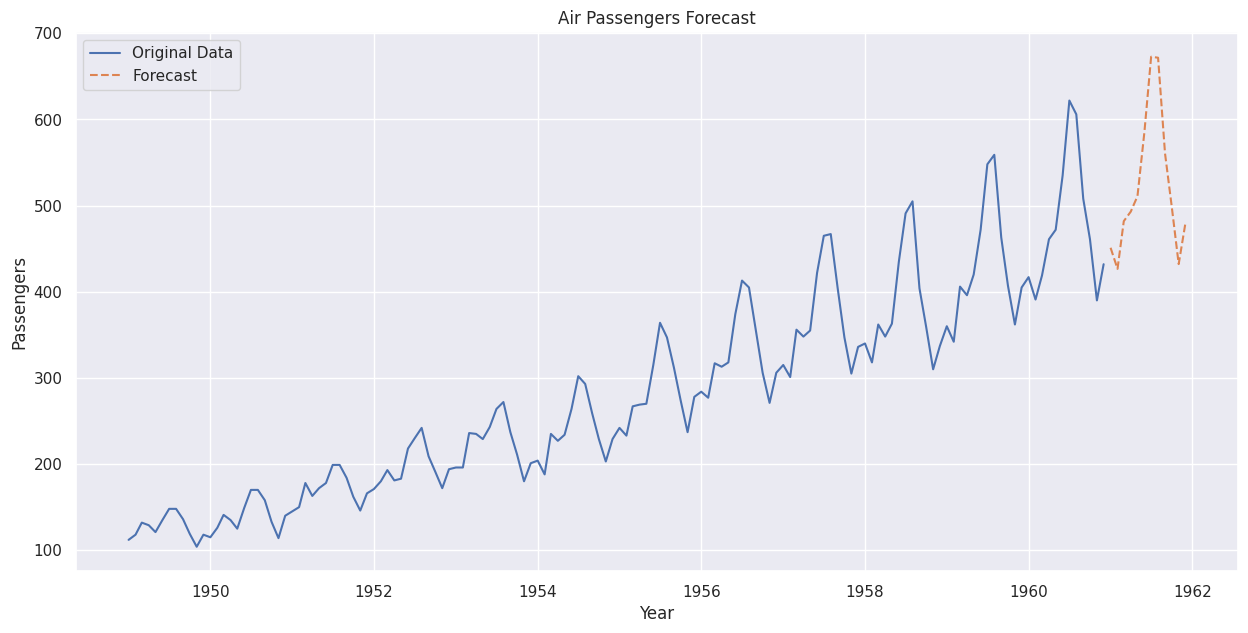

In [ ]:
plt.figure()
plt.plot(df, label="Original Data")
plt.plot(forecast, label="Forecast", linestyle="--")
plt.title("Air Passengers Forecast")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [ ]:
# plot it in px line plot
fig = px.line(df, x=df.index, y='Passengers', title='Air Passengers Over Time')
fig.add_scatter(x=forecast.index, y=forecast.values, mode='lines', name='Forecast')
fig.show()

> The forecast line shows a steady rise in air passenger numbers, continuing the historical upward trend with clear seasonal patterns. It smoothly extends from the actual data, indicating the model has effectively captured both growth and seasonality.

# **Conclusion:**
The air passenger data and forecast together indicate a clear long-term growth trend in air travel, with consistent seasonal cycles continuing into the future. This suggests rising demand for air transportation, driven by both steady expansion and predictable seasonal peaks.


#